In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random
import operator
import math
from sklearn import datasets
from fcmeans import FCM
#note that this code works for numpy arrays, but can easily be fine tuned for dataframes
def mu(k, dataset):
    SEED =42
    rng = np.random.default_rng(SEED)
    mat = rng.random((k, len(dataset)))
    matrix = np.zeros_like(mat)
    for i in range(len(dataset)):
        for j in range(k):
            n = mat[:,i]
            matrix[j][i] = mat[j][i]/np.sum(n)
    return matrix
def Cluster_Center(mu, m, k, dataset):
    mat = np.zeros_like(mu) # calculating the cluster center
    for i in range(k):
        for j in range(len(dataset)):
            mat[i][j] = (mu[i][j])**m
    numerator = np.matmul(mat, dataset)
    center  =  []
    for k in range(mat.shape[0]):
        center.append(np.divide(numerator[k], sum(mat[k])))
    return center
def updatemu(mat, m, k, dataset): # Updating the membership value
    p = float(2/(m-1))
    cluster_center = Cluster_Center(mat, m,k, dataset )
    for i in range(len(dataset)):
        x = list(dataset[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_center[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            mat[j][i] = float(1/den)       
    return mat
def getClusters(mat, dataset): # getting the clusters
    cluster_labels = list()
    for j in range(len(dataset)):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(mat[:,j]))
        cluster_labels.append(idx)
    return cluster_labels
def fcm(k, m, dataset, max_iter): #Third iteration Random vectors from data
    # Membership Matrix
    """clusters with respect to a membership value between 0 and 1,
    the higher the mebership to a cluster then the point is assigned to that cluster
    """
    membership_mat = mu(k, dataset)
    curr = 0
    acc=[]
    while curr < max_iter:
        cluster_centers = Cluster_Center(membership_mat, m, k, dataset)
        membership_mat = updatemu(membership_mat, m, k, dataset)
        cluster_labels = getClusters(membership_mat, dataset)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("---------")
        curr += 1

    #return cluster_labels, cluster_centers
    return np.array(cluster_labels), np.array(cluster_centers), np.array(membership_mat)


In [3]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples = 200, random_state = 170)
A, B, C = fcm(3,2,X,1000)


---------


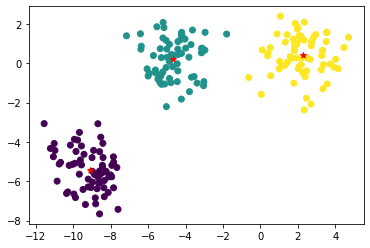

In [4]:
plt.scatter(X[:,0], X[:,1], c= A)
plt.scatter(B[:,0], B[:,1], marker = '*', c= 'r')